In [50]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [7]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [11]:
data["species"] = iris.target
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [70]:
d = data[data["species"] != 2]
d.head(90)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,1
86,6.7,3.1,4.7,1.5,1
87,6.3,2.3,4.4,1.3,1
88,5.6,3.0,4.1,1.3,1


In [31]:
x = d.iloc[:,[0,2]]
y = d["species"]

DEFINING PERCEPTRON

In [32]:
def perceptron(x,w,b):
    y_hat = np.dot(x,w) + b
    step_f = np.where(y_hat >= 0, 1, 0)
    return step_f

In [43]:
def train(x,y,w,b,l,epochs):
    x = np.array(x)  # Ensure x is a NumPy array
    y = np.array(y)
    for e in range(epochs):
        for i in range(len(x)):
            y_hat = perceptron(x[i],w,b)
            error = y[i] - y_hat
            w = w + l * error * x[i]
            b = b + l * error
    return w,b

DEFINING WEIGHTS AND BIASES

In [44]:
w = np.zeros(2)
b = 0
l = 0.1
epochs = 1000

CALLING THE TRAIN FUNCTION

In [45]:
w, b = train(x, y, w, b, l, epochs)

In [46]:
w,b

(array([-0.34,  0.91]), np.float64(-0.2))

PREDICTIONS USING PERCEPTRON FUNCTION

In [ ]:
a = np.array([6.7,4.7]) //
pre_val = perceptron(a,w,b)
print("Predicted Value :",pre_val)

Predicted Value : 1


In [ ]:
x = np.array(x)  # Convert to NumPy array
y = np.array(y)  # Convert to NumPy array

PLOTING DECISION BOUNDARY

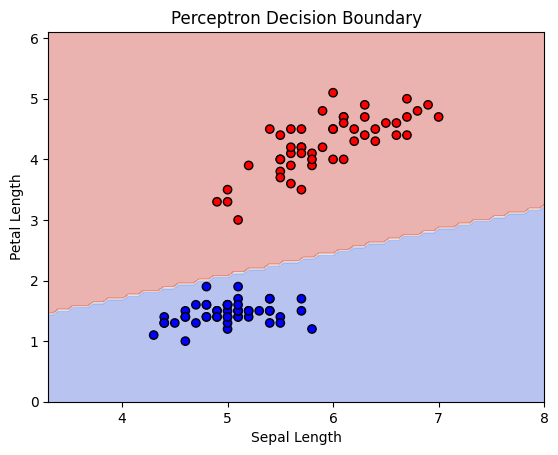

In [108]:
def plot_decision_boundary(x, y, w, b):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = np.array([perceptron(p, w, b) for p in grid])
    zz = zz.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, zz, alpha = 0.4, cmap='coolwarm')
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='black')
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(x, y, w, b)
